<a href="https://colab.research.google.com/github/shreyas-bala/Shreyas-Personal-Projects/blob/main/frequency_domain_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Instructions**

## **Introduction Section**

##**1. Purpose of the Notebook:**
Utilizing Fourier Transform for image filtering and frequency analysis.

##**2. Learning Outcomes:**
* Understanding how a fourier transform works
* Exploring the Convolution Theorem
* Image Filtering using FFT(Fast Fourier Transform)
* Comprehending different frequency Domain Filtering(Low Pass, High Pass and Band Pass Filters)


##**3. Prerequisites:**
* A basic knowledge of what the fourier series is
* Basics of image filtering techniues
* Comfort with image processing libraries (e.g., OpenCV)

## **Fourier Transform**

Lets first make a random signal which is a combination of different frequencies

**Importing Libraries:**

Include code cells to import necessary Python libraries.




In [ ]:
import math
import random
import matplotlib.pyplot as plt

## **Conceptual Overview Section**

**Creating the time vector:**

 In any sine curve the x axis reprents time, so we need to create a time:

In [ ]:
total_num = 1024  # Ensure this is a power of 2
rate = 500  # in Hz
time_vector = [i/rate for i in range(total_num)]

**Sine Wave**
A sine wave is described mathematically by the equation:

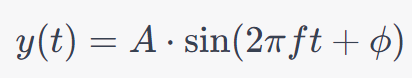


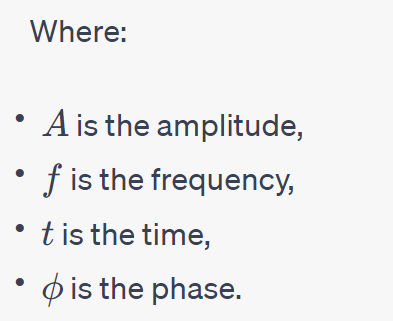

But in a random signal, its a comination of these sine and cosine waves with different frequencies and other parameters.
So we shall add 2 sine waves now to crate a complex periodic wave.

To make this into a signal, we'd need to add noise

**Noise**

Random noise is simply added here to simulate real signals (or interference)
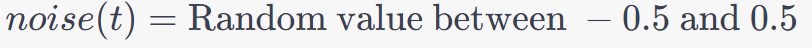

The random.uniform(-0.5, 0.5) function generates a random float number between -0.5 and 0.5, creating a noise signal.


In [ ]:
def signal(time_vector):
    signal_wave = [math.sin(2.0 * math.pi * 1.0 * tt) + 0.5 * math.sin(2.0 * math.pi * 7.0 * tt) for tt in time_vector]
    noise = [random.uniform(-0.5, 0.5) for _ in time_vector]
    signal_wave = [sum(x) for x in zip(signal_wave, noise)]
    return signal_wave

signal_and_noise = signal(time_vector)

**Defining basic complex number operations**

In [ ]:
# Define basic complex number operations
def add(x, y):
    return [x[0] + y[0], x[1] + y[1]]

def subtract(x, y):
    return [x[0] - y[0], x[1] - y[1]]

def multiply(x, y):
    real = x[0] * y[0] - x[1] * y[1]
    imag = x[0] * y[1] + x[1] * y[0]
    return [real, imag]

**Fast Fourier Transform (FFT) - Mathematical Background:**

Mathematically it's defined as: The Fast Fourier Transform (FFT) is an algorithm to compute the Discrete Fourier Transform (DFT) and its inverse. FFT is widely used for many applications in engineering, science, and mathematics. The basic idea is to decompose a DFT of any composite size N = N1N2 into many smaller DFTs of sizes and , recursively, to reduce the computation time.


A DFT converts a sequence of complex numbers
image.png into another sequence of complex numbers
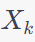.Mathematically it's defined as:

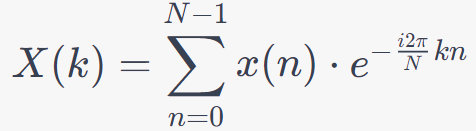

where:

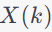
 are the DFT coefficients (or the DFT spectrum),

image.png is the input signal,

image.png is the total number of samples,

image.png is the imaginary unit.
1. **Base Case:**

If N (the number of samples) is less than or equal to 1, the FFT of x is simply x itself.


```
if N <= 1:
    return x
```



*2*. **Divide:**


    x_even = FFT(x[0::2])

    x_odd = FFT(x[1::2])

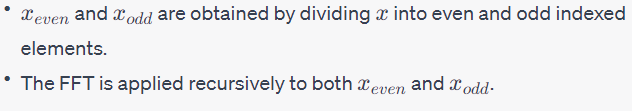    


3. **Twiddle Factors:**

` T = [[math.cos(2 * math.pi * k / N), -math.sin(2 * math.pi * k / N)] for k in range(N // 2)]`

T contains the twiddle factors, which are complex exponential terms used in the FFT calculation. Mathematically

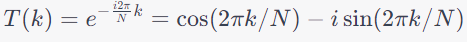

image.png



4. **Combine:**

`factor = [multiply(T[k], x_odd[k]) for k in range(N // 2)]`

This computes the product of twiddle factors and the FFT of the odd-indexed input data, which is mathematically represented as:

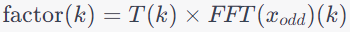

    return [add(x_even[k], factor[k]) for k in range(N // 2)] + \
           [subtract(x_even[k], factor[k]) for k in range(N // 2)]


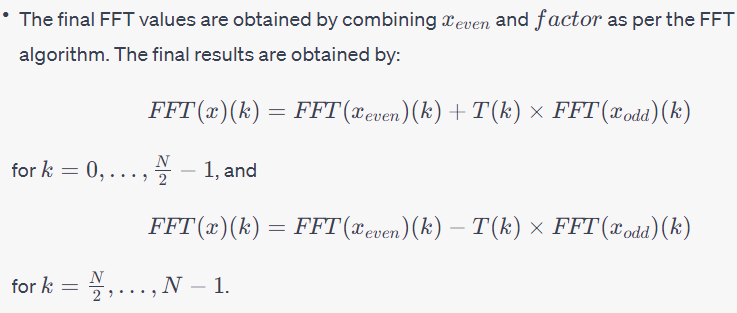

The FFT function is implemented in a recursive manner, which allows for significantly reducing the computational complexity from 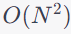  (as in the direct DFT calculation) to image.png







## **Code Examples Section**







In [ ]:
# Implement FFT by manually managing complex number calculations
def FFT(x):
    N = len(x)
    if N <= 1:
        return x
    else:
        x_even = FFT(x[0::2])
        x_odd = FFT(x[1::2])
        T = [[math.cos(2 * math.pi * k / N), -math.sin(2 * math.pi * k / N)] for k in range(N // 2)]
        factor = [multiply(T[k], x_odd[k]) for k in range(N // 2)]
        return [add(x_even[k], factor[k]) for k in range(N // 2)] + \
               [subtract(x_even[k], factor[k]) for k in range(N // 2)]

**Converting signal to complex format**



In [ ]:
# Convert signal to a vector
signal_and_noise_complex = [[val, 0.0] for val in signal_and_noise]

Now apply fft

In [ ]:
# Apply FFT
fft_result = FFT(signal_and_noise_complex)

**FFT Magnitude Calculation**

`magnitudes = [math.sqrt(val[0]**2 + val[1]**2) for val in fft_result]`

This part calculates the magnitudes of the FFT output. Given that the FFT output is in complex number format (real and imaginary parts), the magnitude (or modulus) of each component is calculated as:

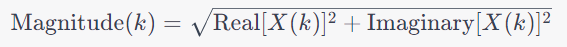

where,

X(k) are the FFT output coefficients.



In [ ]:
# Compute magnitudes
magnitudes = [math.sqrt(val[0]**2 + val[1]**2) for val in fft_result]

Displaying results

In [ ]:
# Display results
for i in range(len(fft_result)):
    print(f"Frequency component {i}: Magnitude {magnitudes[i]:.2f}")

Frequency component 0: Magnitude 7.91
Frequency component 1: Magnitude 21.67
Frequency component 2: Magnitude 507.40
Frequency component 3: Magnitude 27.78
Frequency component 4: Magnitude 8.95
Frequency component 5: Magnitude 11.27
Frequency component 6: Magnitude 13.53
Frequency component 7: Magnitude 30.83
Frequency component 8: Magnitude 17.85
Frequency component 9: Magnitude 12.11
Frequency component 10: Magnitude 24.71
Frequency component 11: Magnitude 12.26
Frequency component 12: Magnitude 30.91
Frequency component 13: Magnitude 56.05
Frequency component 14: Magnitude 223.03
Frequency component 15: Magnitude 114.16
Frequency component 16: Magnitude 40.21
Frequency component 17: Magnitude 31.13
Frequency component 18: Magnitude 22.83
Frequency component 19: Magnitude 7.70
Frequency component 20: Magnitude 11.74
Frequency component 21: Magnitude 11.94
Frequency component 22: Magnitude 14.92
Frequency component 23: Magnitude 12.63
Frequency component 24: Magnitude 11.82
Frequency 

**Plotting Signal and FFT Magnitudes**

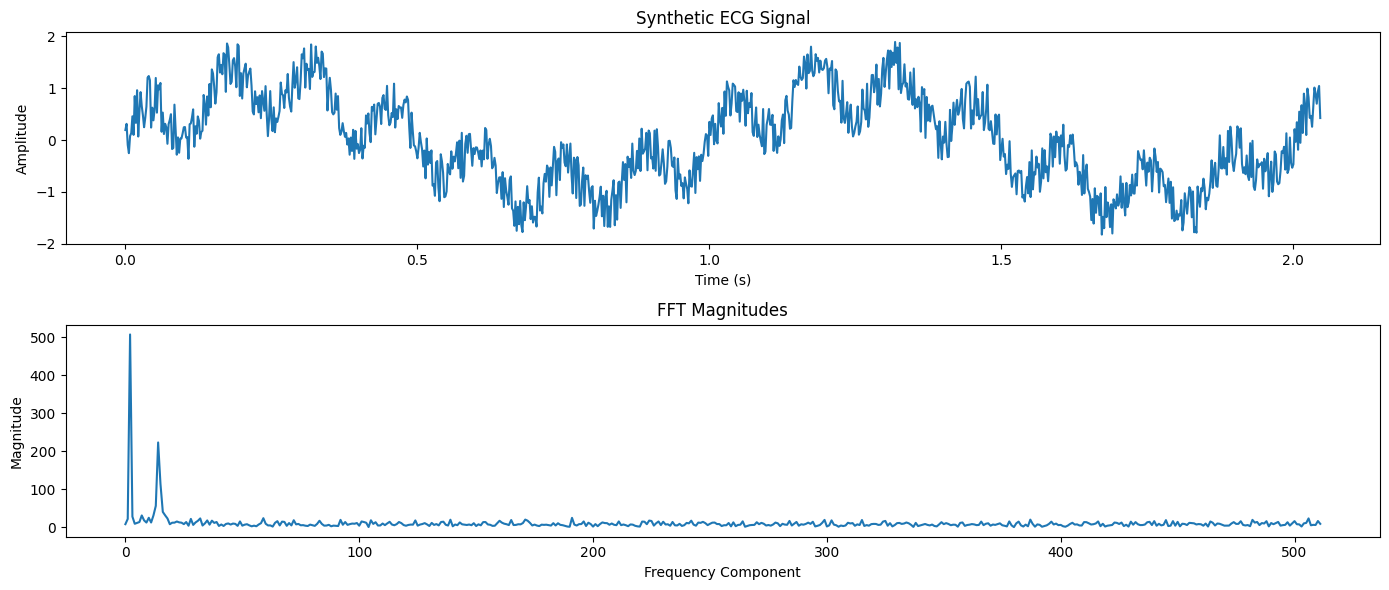

In [ ]:
# Plotting
plt.figure(figsize=(14, 6))

# Plot the signal with noise
plt.subplot(2, 1, 1)
plt.plot(time_vector, signal_and_noise)
plt.title('Signal with noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot FFT magnitudes
plt.subplot(2, 1, 2)
plt.plot(magnitudes[:len(magnitudes) // 2])  # Only plot up to the 1024 limit
plt.title('FFT Magnitudes')
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

1. **Solution Explanation:** Provide a detailed explanation of the algorithm, technique, or solution being implemented. This can include both theoretical and practical aspects.

2. **Real-world Scenario Description:** Provide a detailed description of the real-world scenario or problem being addressed.

# **For Machine Learning**

## **Data Exploration and Preprocessing Section**

1. **Dataset Overview:** Introduce and load the dataset. Provide a description of its features, target variable, and any real-world application of the data.

2. **Data Cleaning and Preprocessing:** Demonstrate steps for data cleaning, handling missing values, feature encoding, and normalization.

3. **Exploratory Data Analysis (EDA):** Use visualizations and statistics to explore relationships in the data, feature distributions, and other insights.

## **Algorithm Explanation Section**

1. **Theoretical Background:** In-depth explanation of the ML algorithm, including its mathematical foundations and how it works.

2. **Visual Illustrations:** Use diagrams or plots to visually explain the algorithm's working principle (e.g., decision boundaries in classification).

## **Model Building Section**

1. **Code Implementation:** Step-by-step coding of the ML model, including setting up training and testing data, choosing model parameters, and fitting the model.

2. **Comments and Documentation:** Comment the code to explain the purpose and functionality of each step.

## **Model Evaluation Section**

**1. Performance Metrics:** Discuss and implement various performance metrics relevant to the task (e.g., accuracy, precision, recall, F1-score for classification).

**2. Validation Techniques:** Illustrate techniques like cross-validation, and explain their importance in evaluating the model's effectiveness.

## **Advanced Topics**

1. **Hyperparameter Tuning:** Show how to use techniques like grid search or random search for optimizing model parameters.

2. **Feature Importance:** Demonstrate methods to evaluate the importance of different features in the model.

## **Inferences**

1. Outcome
2. Summary